# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
# The primary task here is to identify the key data elements corresponding to appropriate regions that will help determine the used car prices.
# Frame a data table that comprises the most important features, and eliminate others.
# Examples could be miles, car brand, color, engine condition, seating capacity etc
# Ensure that we don't over fit because time taken to come to a conclusion is very important too. 
# Also make a note of the period for which the evaluation has to be performed.
# Look for patterns that indicate if a consistent observation can be made with the feature set to conclude if the car prices increase or decrease. 
# Also ensure that the data is split into development set and test set to get absolute confidence.
# And finally, use graphs, plots to explain these concepts with ease to the client (USED CAR DEALER)


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
# 1. Determine the number of entries in the data set
# 2. Check for the number of columns -- This will give us a notion about the feature set we have in hand
# 3. Identify X and y -- X here would mean what columns must be considered to come to a conclusion y.
# 4. Double check if the data is populated correctly, if not for this step, we could arrive at incorrect conclusions


# In the above example we have in hand price can be determined as y and everything else can be listed as X.
# From the data populated above, price is the target while all the other features are used to determine the price.



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
#At this point fetch the data set from csv file
raw_car_data = pd.read_csv("data/vehicles.csv")
#raw_car_data.head(15)


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Duplicated value is  19242
Bfore (50054, 8)
After (54430, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50054 entries, 0 to 50053
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          50054 non-null  float64
 1   manufacturer  50054 non-null  object 
 2   condition     50054 non-null  object 
 3   fuel          50054 non-null  object 
 4   odometer      50054 non-null  float64
 5   title_status  50054 non-null  object 
 6   paint_color   50054 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.7+ MB
<class 'pandas.core.series.Series'>
RangeIndex: 50054 entries, 0 to 50053
Series name: price
Non-Null Count  Dtype
--------------  -----
50054 non-null  int64
dtypes: int64(1)
memory usage: 391.2 KB


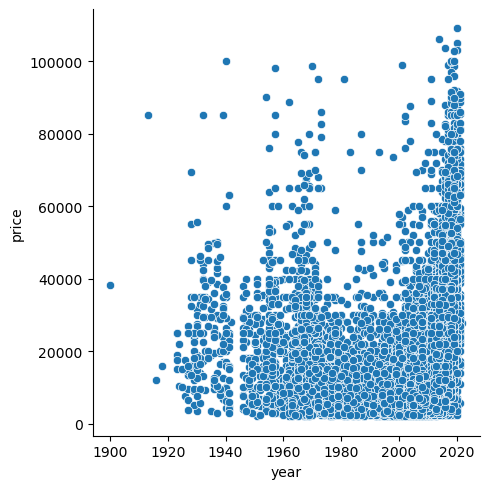

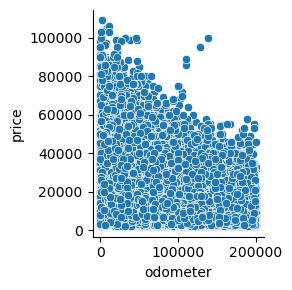

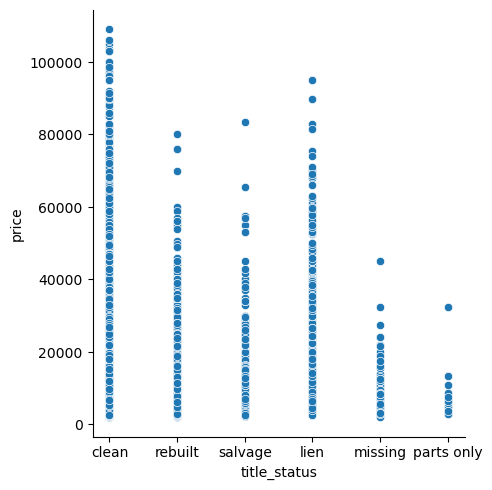

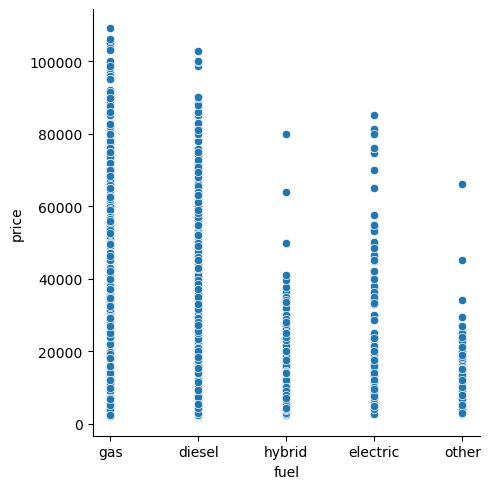

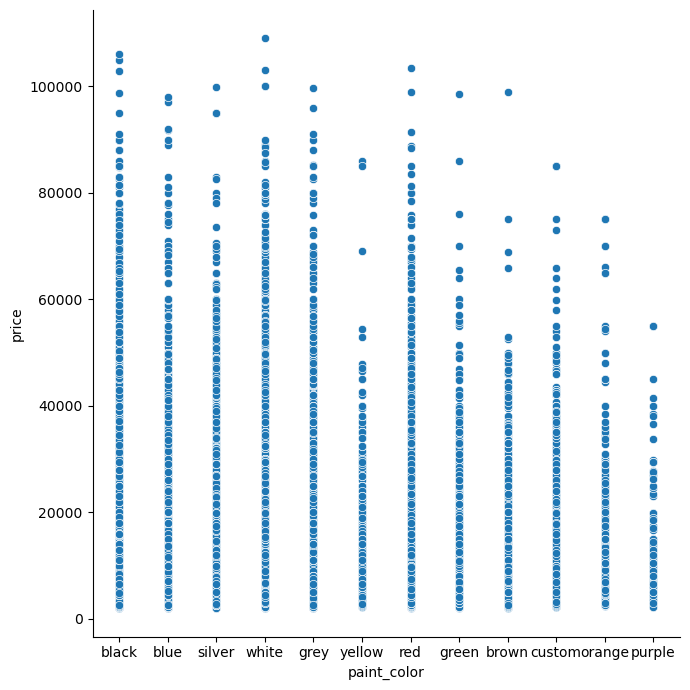

0     15000
1     19900
2     14000
3     22500
4     15000
5      3000
6      9500
7     22950
8     10950
9     21250
10    32000
11     4000
12     3000
13     2500
14    12500
Name: price, dtype: int64

In [59]:
# 1st redundancy removal
# Remove all the unwanted columns which are not needed for car price prediction
# This is an important step to improve processing times, on an outset the below columns don't add too much
# Removable columns
# id, region, model, vin, state

clean_car_data = raw_car_data.drop(columns=['id','region','VIN','state','model'])

#Remove all data that is not a number
clean_car_data = clean_car_data.dropna()

#Also remove cylinders from the column 'cylinder'
clean_car_data['cylinders'] = clean_car_data['cylinders'].str.replace("cylinders","")

#Check for any duplicate data
print("Duplicated value is ",clean_car_data.duplicated().sum())

clean_car_data.drop_duplicates(inplace = True)
#At this point, we are free of any duplicate data as well as null data                                    


#Going over another check, remove drive, size, type, and transmission because by visual
#inspection these don't have a significant impact on the price
processed_car_data = clean_car_data.drop(columns=['drive','size','type','transmission','cylinders'])

#Upper and lower price limit - If the data exceeds these limits, then we ask the used car shop to not consider this model
print("Bfore",new_processed_car_data.shape)
new_processed_car_data = processed_car_data[processed_car_data['odometer'] < 200000]
print("After",new_processed_car_data.shape)

new_processed_car_data = processed_car_data[(processed_car_data['price'] < 110000) & (processed_car_data['price'] > 2000) & 
                                            (processed_car_data['odometer'] < 200000)] 

new_processed_car_data = new_processed_car_data.reset_index(drop=True)
X = new_processed_car_data.drop(columns='price')
y = new_processed_car_data['price']

X.info()
y.info()


#Lets plot some graphs to understand the co-relation between Engine Vs. Price, Mileage Vs. Price
sns.relplot(new_processed_car_data, x = 'year', y = 'price', )
sns.relplot(new_processed_car_data, x = 'odometer', y = 'price', height = 3)
sns.relplot(new_processed_car_data, x = 'title_status', y = 'price')
sns.relplot(new_processed_car_data, x = 'fuel', y = 'price')
sns.relplot(new_processed_car_data, x = 'paint_color', y = 'price',height = 7);
plt.show()

#Split the data into training and test data (80/20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
y.head(15)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

#X_train.info()

ohe = OneHotEncoder()
column_trans = make_column_transformer((ohe,['manufacturer','condition','fuel','title_status','paint_color']),
                                        remainder='passthrough')
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

#Now check the R2 score to determine how accurate our predictions are 
r2_val = r2_score(y_test,y_pred)
print("R2 score is", r2_val)



R2 score is 0.40570599288944675


In [48]:
processed_car_data1 = new_processed_car_data.drop(columns=['manufacturer','condition','fuel','title_status','paint_color'])
X1 = processed_car_data1.drop(columns='price')
y1 = processed_car_data1['price']

X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.25)


lr1 = LinearRegression()
lr1.fit(X1_train,y1_train)
y1_pred = lr1.predict(X1_test)
r2_val1 = r2_score(y1_test,y1_pred)
print("R2 score with only Linear Regression is", r2_val1)




R2 score is 0.24176017956853746


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Initially when the columns were used as is, there was a negative R2 value which implied that something was not fitting correctly
# Then on cleaning the data better, removing the outliers, removing duplicates, there were good improvements.
# Also to improve processing times, I removed certain categorical features like drive, type, size, transmission, and cylinders.
# This coupled with using OnehotEncoding and Linear Regression through the pipeling model, the R2 value was upto to around 41%. 
# Just to draw comparisons, I only conducted a linear regression model too and there the R2 value was only 25% indicating using multiple features 
# provided the use of a better model.

# Also it is very clear to the client that the primary features to look forward to that determine the price of a car are
# 1. Year
# 2. Odometer reading
# 3. Condition
# 4. Fuel type
# 5. Manufacturer
# 6. Title
# 7. Color

# More of this will be clearly summarized in the final report



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
# BRIEF REPORT

# In order to estimate the price of a used car, some of the most important aspects that were noticed from the data are

# 1. As the car becomes older the price decreases - refer to the plot of Price Vs. Year
# 2. As the odometer reading increases, the price again decreases
# 3. The color of the car seems to not matter too much in factoring the price of the car
# 4. Gas cars are the most popular of the lot, the price is higher for gas cars
# 5. The clean condition cars seemed to have a bigger impact than any other conditions
# 6. A bunch of features like model, vin number, car type have minimal or no impact in determining the car price.
# 7. Also ensure that this model is not used for outliers - 
# Ex: If the odometer reading is 500000, the car predictions may not yield appropriate values.

# This model yielded an R2 metric value of around 40%. 

# An application can be developed with ease with the below model. This application will take in all the features as input parameters
# and provide the car price as an output.



